In [1]:
import datetime
from pylab import np
import matplotlib.pyplot as plt

g = 9.8 # grav. acceleration [m/s^2]
L = 9.8 # pendulum length [m]
beta = 0.25 # damping constant [s^-1]
alpha = 1.0 # magnitude of driving force [N]
omega_F = 2./3. # magnitude of driving force [s^-1]
print("natural freq.", np.sqrt(g/L))

Nsteps = 16000 # number of steps
Nperiods = 40. # number of oscillation peri
tf = 2.*np.pi*Nperiods/(omega_F*np.sqrt(g/L)) # time range in period units
dt = tf/float(Nsteps-1) # time step [s]

t = np.linspace(0, tf, Nsteps) # Nx1 evenly spaced t_i time array
theta = np.zeros([Nsteps,2]) # Nx2 array (N rows, 2 columns) for y_i, v_i state

def rk4(y, t, dt, derivs): # rk4 method y_i -> y_i+1
    k1 = dt * derivs(y, t)
    k2 = dt * derivs(y + k1 / 2., t + dt / 2.)
    k3 = dt * derivs(y + k2 / 2., t + dt / 2.)
    k4 = dt * derivs(y + k3, t + dt)
    y_next = y + (k1 + 2.*k2 + 2.*k3 + k4) / 6.
    return y_next

def pendulum( y, t):
    diff0 = y[1] # dtheta/dt = omega
    diff1 = -(g/L)*np.sin(y[0])
    diff1 -= 2.*beta*y[1] # domega/dt = −(g/L)*sin(theta)
    diff1 += alpha*np.cos(omega_F*t)
    return np.array([diff0, diff1])

natural freq. 1.0


550089

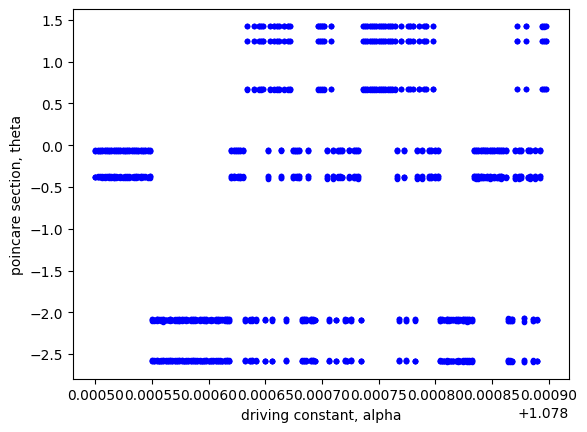

In [10]:
theta_o = 0.1 # initial angle [radians]
omega_o = 0.0 # inital angular velocity [rad/s]
theta[0,0] = theta_o
theta[0,1] = omega_o

Nalpha = 200 # steps
dalpha = 0.0004 # range
alpha = 1.0785 # start

Nsection = int(Nsteps/Nperiods)
Ntransient = 12000

ts = datetime.datetime.now()

for k in range(Nalpha):
    for j in range(Nsteps-1): # Loop over steps
        theta[j+1] = rk4(theta[j], t[j], dt, pendulum)

    thetan = theta[:,0].copy()
    omegan = theta[:,1].copy()
    thetanp = (thetan+np.pi)%(2.*np.pi)-np.pi
    thetanp = thetanp[Ntransient::Nsection]
    omegan = omegan[Ntransient::Nsection]
    alpha_array = np.full( (thetanp.size,), alpha)
    plt.plot(alpha_array,thetanp,"b.")
    #alpha_array = np.full( (omegan.size,), alpha)
    #plt.plot(alpha_array,omegan,"b.")

    alpha += dalpha/Nalpha #0.001

plt.xlabel("driving constant, alpha")
plt.ylabel("poincare section, theta")

te = datetime.datetime.now()
deltat = te - ts
deltat.microseconds